# Figure Generation Code
## ISU High School Research Symposium(4/23/25) Version

### Code which was used in order to get images for figures 

In [2]:
%pip install matplotlib
%pip install PIL
%pip install numpy
%pip install skimage

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PIL


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached skimage-0.0.tar.gz (757 bytes)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


Code for the Images in the diagram

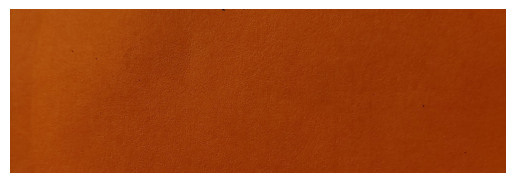

In [3]:
import os

IMAGE_SAMPLE = 'Sample_Images/1(5).jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import numpy as np

img = Image.open(IMAGE_SAMPLE)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


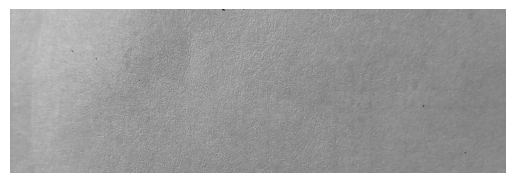

In [4]:
img = img.convert("L")
plt.imshow(img, cmap="gray")
plt.axis('off')  # Hide axes
plt.show()

In [5]:
image_array = np.array(img)
graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

array([[[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       ...,


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]]])

$$
\mathbf{GLCM} = \Big[\, \big[\, [a_{ijkl}]_{i,j=1}^{2} \,\big]_{k,l=1}^{2} \,\Big]
$$

$$\mathbf{GLCM}=\left(
\begin{array}{cccc}
  \left[\left[\left[ 0. \right]\right]\right] & 
  \left[\left[\left[ 0. \right]\right]\right] & 
  \cdots & 
  \left[\left[\left[ 0. \right]\right]\right] \\
  \left[\left[\left[ 0. \right]\right]\right] & 
  \left[\left[\left[ 0. \right]\right]\right] & 
  \cdots & 
  \left[\left[\left[ 0. \right]\right]\right] \\
  \vdots & \vdots & \ddots & \vdots \\
  \left[\left[\left[ 0. \right]\right]\right] & 
  \left[\left[\left[ 0. \right]\right]\right] & 
  \cdots & 
  \left[\left[\left[ 0. \right]\right]\right] \\
\end{array}
\right)$$

Next is also all the LaTeX Representations of all the GLCM Features - I may need to add more depending on how later tests of correlation are

$$\text{Entropy}=-\sum_{i}\sum_{j}P(i,j)\log{P(i,j)}$$

$$\text{Contrast}=\sum_{i}\sum_{j}P(i,j)(i-j)^2$$

$$\text{Homogenity}=\sum_{i,j=0}^{N-1}{\frac{P(i,j)}{1+(i-j)^2}}





In [6]:
import requests
from io import BytesIO

import skimage

def calculate_glcm_contrast(image_path):
    """Calculates the contrast feature of the GLCM for a given image (local path or URL)."""
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        return contrast

    except Exception as e:
        print(f"Error: {e}")
        return None
def calculate_glcm_entropy(image_path):
    try:
        img = Image.open(image_path).convert('L')
        image_as_arr = np.array(img)
        return skimage.measure.shannon_entropy(image_as_arr)
    except Exception as e:
        print(f"Error: {e}")
        return None
def calculate_glcm_homogenity(image_path):
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        homogenity = graycoprops(glcm, 'homogeneity')[0, 0]
        return homogenity
    except Exception as e:
        print(f"Error: {e}")
        return None
def calculate_glcm_energy(image_path):
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        homogenity = graycoprops(glcm, 'energy')[0, 0]
        return homogenity
    except Exception as e:
        print(f"Error: {e}")
        return None
def calculate_glcm_feature(image_path,feature):
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        r = graycoprops(glcm, feature)[0, 0]
        return r
    except Exception as e:
        print(f"Error: {e}")
        return None

Iterating through and getting the Contrast and Shannon Entropy of each image

In [7]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,precision_score,root_mean_squared_error
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt

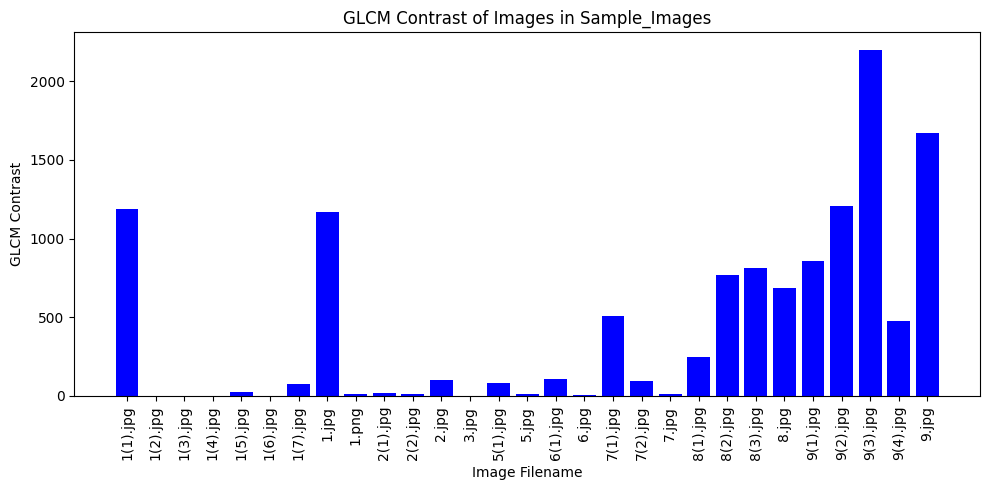

In [8]:
image_dir = 'Sample_Images/'
# List to store the results
contrast_results = []
entropy_results = []
homogenity_results = []
energy_results = []
test_results = []

# Iterate over all files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        contrast_value = calculate_glcm_contrast(image_path)
        entropy_val = calculate_glcm_entropy(image_path)
        homogenity_val = calculate_glcm_homogenity(image_path)
        energy_val = calculate_glcm_energy(image_path)
        test_val  = calculate_glcm_feature(image_path=image_path, feature='correlation')
        if contrast_value is not None:
            contrast_results.append((filename, contrast_value))
        if entropy_val is not None:
            entropy_results.append((filename,entropy_val))
        if homogenity_val is not None:
            homogenity_results.append((filename,homogenity_val))
        if energy_val is not None:
            energy_results.append((filename,energy_val))
        if test_val is not None:
            test_results.append((filename,test_val))
        
        

# Sort results by filename
contrast_results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, contrast_values = zip(*contrast_results)

# Plot the results

plt.figure(figsize=(10, 5))
plt.bar(filenames, contrast_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Contrast')
plt.title('GLCM Contrast of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ndian\AppData\Local\Temp\ipykernel_17168\3035978168.py:6: RankWarning: Polyfit may be poorly conditioned
  contrast_poly_model = np.poly1d(np.polyfit(ratings, contrast_values, 25))


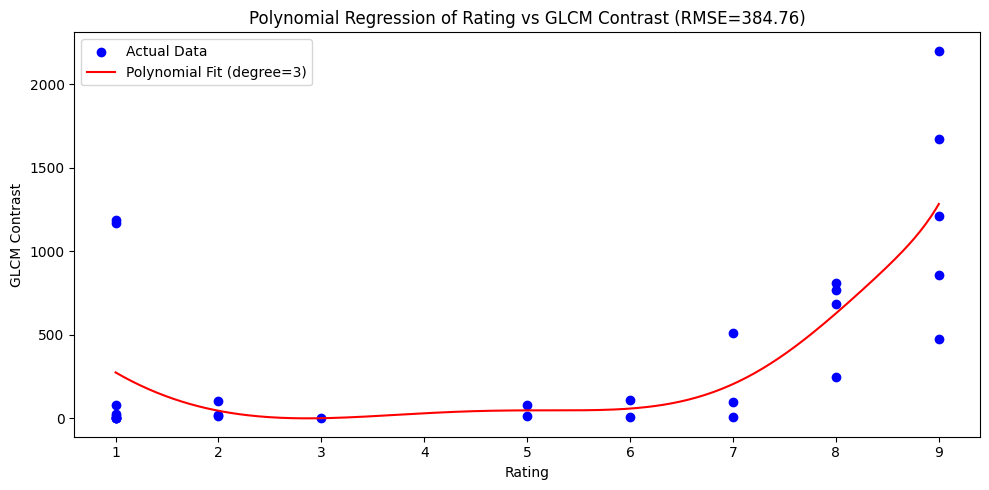

In [9]:
# Extract ratings (first character of the filename) and corresponding contrast values
ratings = np.array([int(filename[0]) for filename in filenames])  # x-values (ratings)
contrast_values = np.array(contrast_values)  # y-values (GLCM contrast)

# Perform polynomial regression (degree 3)
contrast_poly_model = np.poly1d(np.polyfit(ratings, contrast_values, 25))

# Predict contrast values
predicted_contrast = contrast_poly_model(ratings)

# Calculate root mean squared error
rmse = root_mean_squared_error(contrast_values, predicted_contrast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(ratings, contrast_values, color='blue', label='Actual Data')

# Create a smooth curve for the polynomial fit
x_smooth = np.linspace(min(ratings), max(ratings), 300)
y_smooth = contrast_poly_model(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel('Rating')
plt.ylabel('GLCM Contrast')
plt.title(f'Polynomial Regression of Rating vs GLCM Contrast (RMSE={rmse:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

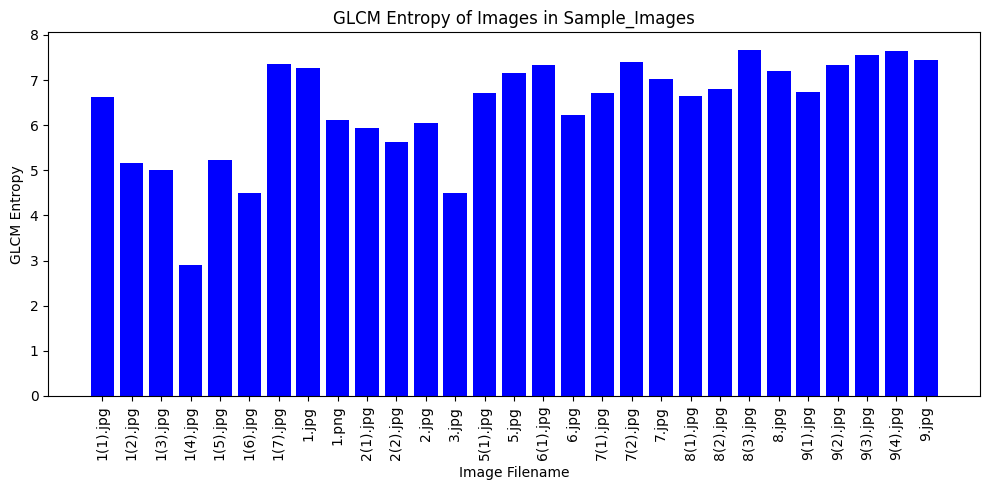

In [10]:
# Sort results by filename
entropy_results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, entropy_values = zip(*entropy_results)

plt.figure(figsize=(10, 5))
plt.bar(filenames, entropy_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Entropy')
plt.title('GLCM Entropy of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

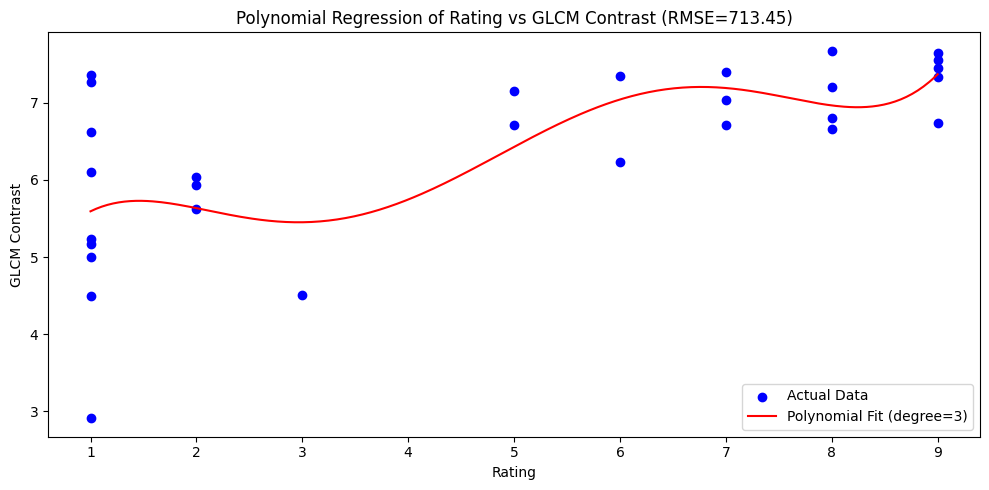

In [11]:
# Extract ratings (first character of the filename) and corresponding contrast values
ratings = np.array([int(filename[0]) for filename in filenames])  # x-values (ratings)
entropy_values = np.array(entropy_values)  # y-values (GLCM contrast)

# Perform polynomial regression (degree 3)
entropy_poly_model = np.poly1d(np.polyfit(ratings, entropy_values, 5))

# Predict contrast values
predicted_entropy = entropy_poly_model(ratings)

# Calculate root mean squared error
rmse = root_mean_squared_error(contrast_values, predicted_entropy)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(ratings, entropy_values, color='blue', label='Actual Data')

# Create a smooth curve for the polynomial fit
entropy_x_smooth = np.linspace(min(ratings), max(ratings), 300)
entropy_y_smooth = entropy_poly_model(entropy_x_smooth)

plt.plot(entropy_x_smooth, entropy_y_smooth, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel('Rating')
plt.ylabel('GLCM Contrast')
plt.title(f'Polynomial Regression of Rating vs GLCM Contrast (RMSE={rmse:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

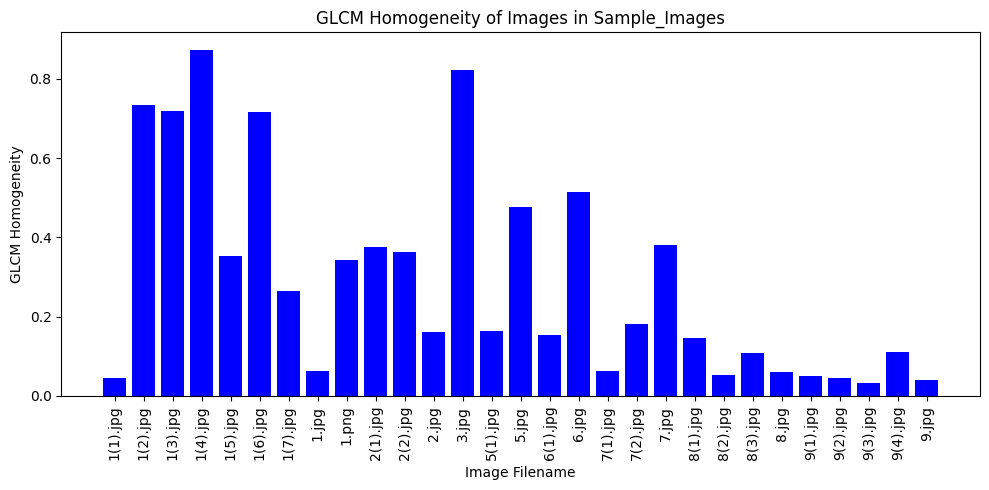

In [12]:
# Sort results by filename
homogenity_results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, homogenity_values = zip(*homogenity_results)

plt.figure(figsize=(10, 5))
plt.bar(filenames, homogenity_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Homogeneity')
plt.title('GLCM Homogeneity of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

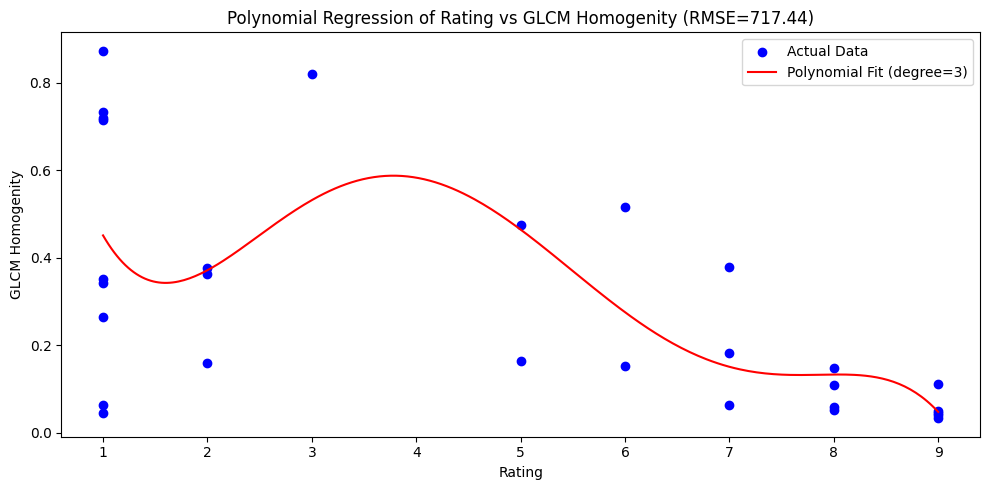

In [13]:
# Extract ratings (first character of the filename) and corresponding contrast values
ratings = np.array([int(filename[0]) for filename in filenames])  # x-values (ratings)
homogenity_values = np.array(homogenity_values)  # y-values (GLCM contrast)

# Perform polynomial regression (degree 3)
homogenity_poly_model = np.poly1d(np.polyfit(ratings, homogenity_values, 5))

# Predict contrast values
predicted_entropy = homogenity_poly_model(ratings)

# Calculate root mean squared error
rmse = root_mean_squared_error(contrast_values, predicted_entropy)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(ratings, homogenity_values, color='blue', label='Actual Data')

# Create a smooth curve for the polynomial fit
homogenity_x_smooth = np.linspace(min(ratings), max(ratings), 300)
homogenity_y_smooth = homogenity_poly_model(homogenity_x_smooth)

plt.plot(homogenity_x_smooth, homogenity_y_smooth, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel('Rating')
plt.ylabel('GLCM Homogenity')
plt.title(f'Polynomial Regression of Rating vs GLCM Homogenity (RMSE={rmse:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

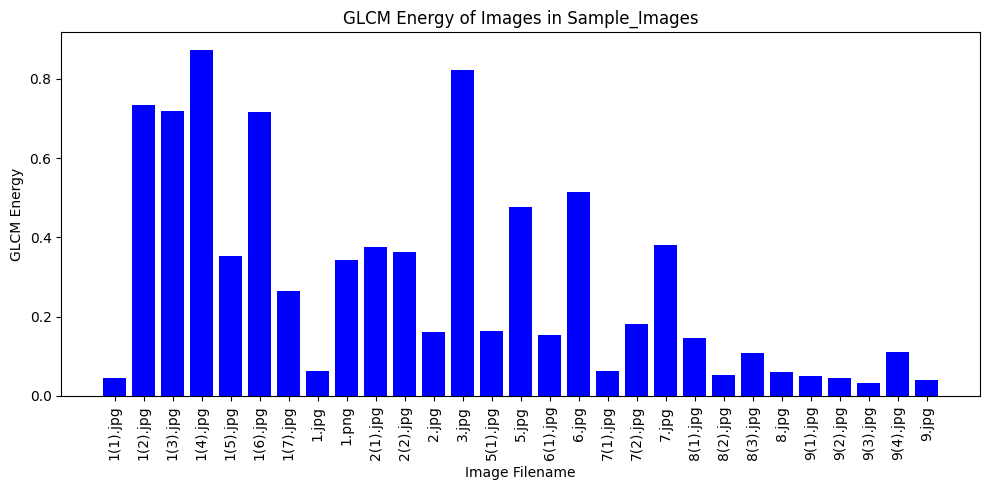

In [14]:
# Sort results by filename
energy_results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, energy_values = zip(*energy_results)

plt.figure(figsize=(10, 5))
plt.bar(filenames, homogenity_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Energy')
plt.title('GLCM Energy of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ndian\AppData\Local\Temp\ipykernel_17168\2201639504.py:6: RankWarning: Polyfit may be poorly conditioned
  energy_poly_model = np.poly1d(np.polyfit(ratings, energy_values, 10))


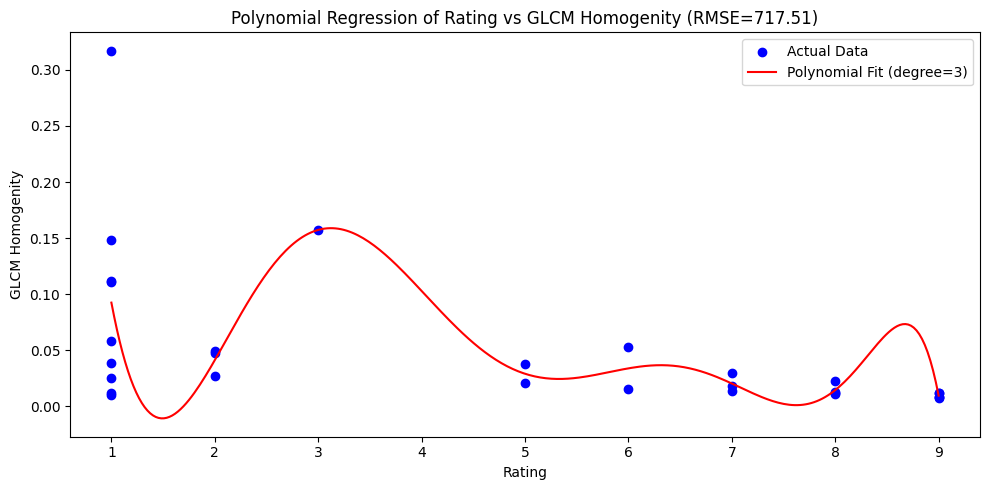

In [15]:
# Extract ratings (first character of the filename) and corresponding contrast values
ratings = np.array([int(filename[0]) for filename in filenames])  # x-values (ratings)
energy_values = np.array(energy_values)  # y-values (GLCM contrast)

# Perform polynomial regression (degree 3)
energy_poly_model = np.poly1d(np.polyfit(ratings, energy_values, 10))

# Predict contrast values
predicted_entropy = energy_poly_model(ratings)

# Calculate root mean squared error
rmse = root_mean_squared_error(contrast_values, predicted_entropy)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(ratings, energy_values, color='blue', label='Actual Data')

# Create a smooth curve for the polynomial fit
energy_x_smooth = np.linspace(min(ratings), max(ratings), 300)
energy_y_smooth = energy_poly_model(energy_x_smooth)

plt.plot(energy_x_smooth, energy_y_smooth, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel('Rating')
plt.ylabel('GLCM Homogenity')
plt.title(f'Polynomial Regression of Rating vs GLCM Homogenity (RMSE={rmse:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

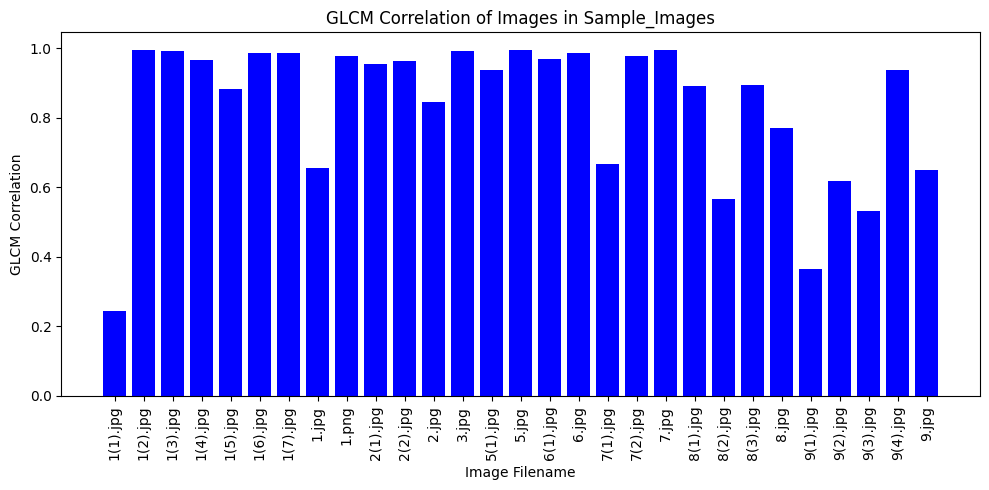

In [16]:
# Sort results by filename
test_results.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, test_values = zip(*test_results)

plt.figure(figsize=(10, 5))
plt.bar(filenames, test_values, color='blue')
plt.xlabel('Image Filename')
plt.ylabel('GLCM Correlation')
plt.title('GLCM Correlation of Images in Sample_Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

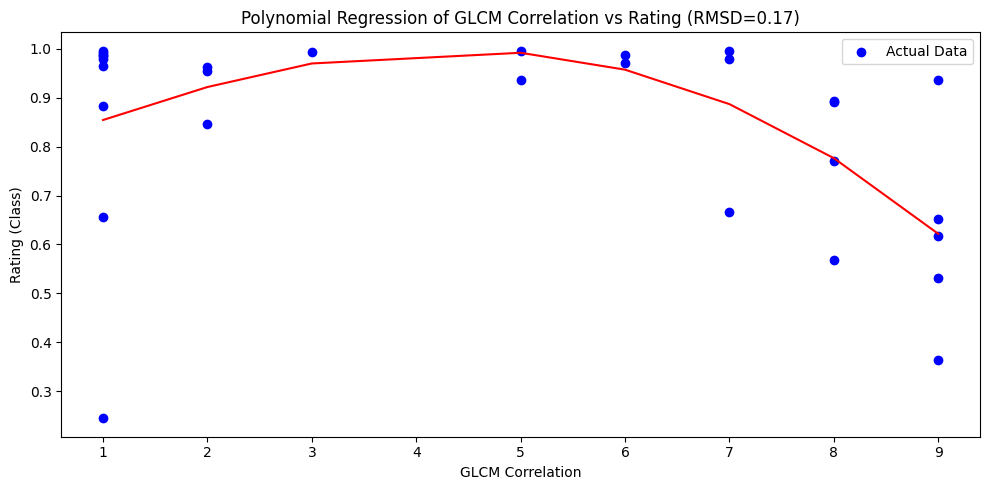

In [17]:


# Extract ratings (first character of the filename) and corresponding contrast values
ratings = [int(filename[0]) for filename in filenames]
test_values = list(test_values)


# Reshape data for logistic regression
y = np.array(test_values)  # Features (GLCM contrast)
X = np.array(ratings)#.reshape(-1, 1)                   # Target (ratings)





# Perform logistic regression
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model = LinearRegression()
#model = LinearSVR()
#model = np.polyfit(X,y,3)
#model.fit(X, y)

polyregr = np.poly1d(np.polyfit(X,y,3))

# Predict ratings
#predicted_ratings = model.predict(X)
predicted_ratings = polyregr(X)

# Calculate accuracy
accuracy = root_mean_squared_error(y, predicted_ratings)

# Plot the logistic regression results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Data')

# Create a range of values for visualization
x_test = np.linspace(min(X), max(X), 300).reshape(-1, 1)

# Get predicted classes for visualization (not probabilities)
#y_pred = model.predict(x_test)
y_pred = polyregr(X)

plt.xlabel('GLCM Correlation')
plt.ylabel('Rating (Class)')
plt.plot(X, y_pred, color='red', label='')  # Changed to plot x_test vs y_pred
plt.title(f'Polynomial Regression of GLCM Correlation vs Rating (RMSD={accuracy:.2f})')
plt.legend()
plt.tight_layout()
plt.show()


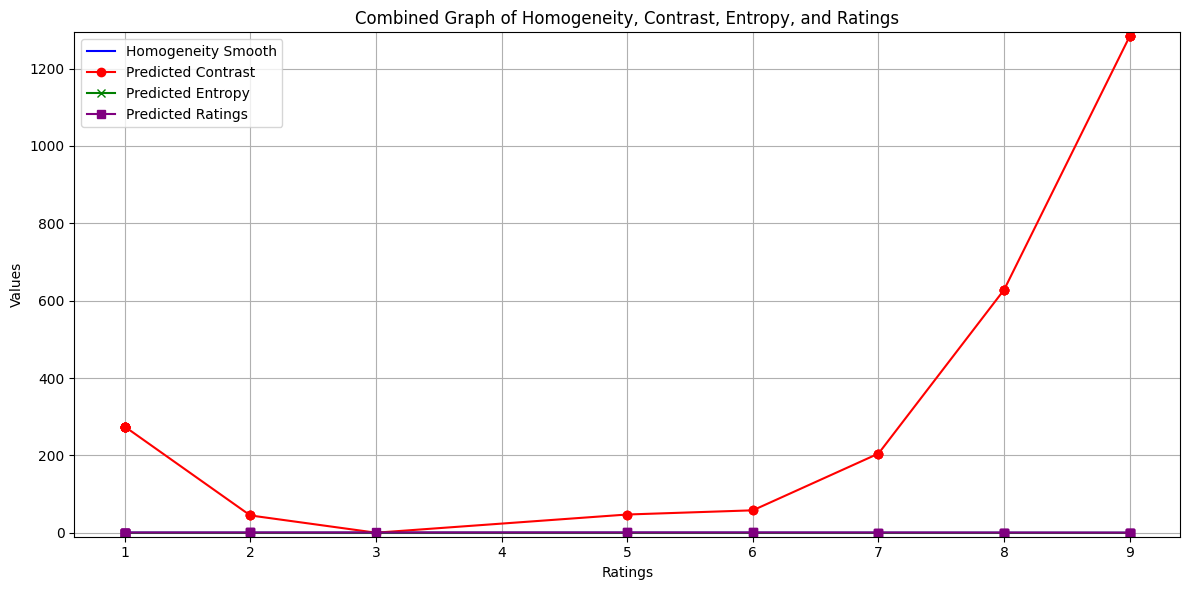

In [18]:

plt.figure(figsize=(12, 6))

# Plot homogenity_y_smooth
plt.plot(homogenity_x_smooth, homogenity_y_smooth, label='Homogeneity Smooth', color='blue')

# Plot predicted_contrast
plt.plot(ratings, predicted_contrast, label='Predicted Contrast', color='red', marker='o')

# Plot predicted_entropy
plt.plot(ratings, predicted_entropy, label='Predicted Entropy', color='green', marker='x')

# Plot predicted_ratings
plt.plot(ratings, predicted_ratings, label='Predicted Ratings', color='purple', marker='s')

# Adjust scales if necessary
plt.ylim(min(min(homogenity_y_smooth), min(predicted_contrast), min(predicted_entropy), min(predicted_ratings)) - 10,
         max(max(homogenity_y_smooth), max(predicted_contrast), max(predicted_entropy), max(predicted_ratings)) + 10)

# Add labels, title, and legend
plt.xlabel('Ratings')
plt.ylabel('Values')
plt.title('Combined Graph of Homogeneity, Contrast, Entropy, and Ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

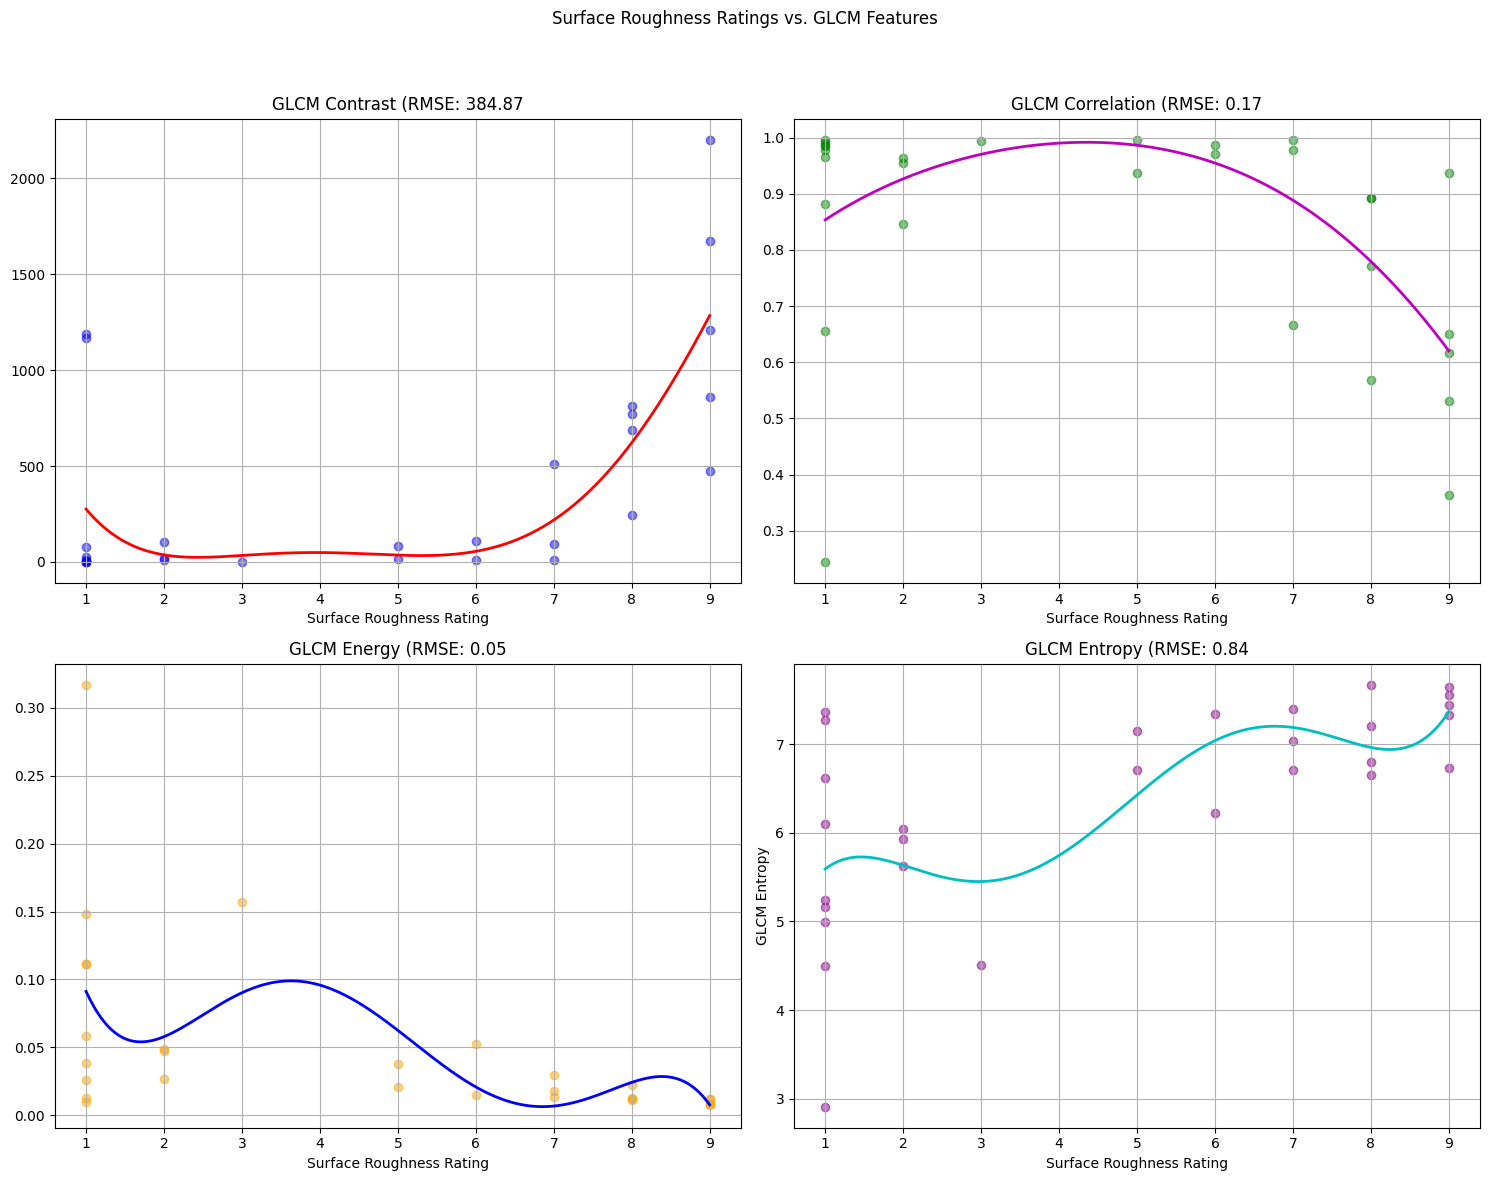

In [19]:
plt.figure(figsize=(14, 8))

# Create subplots for each feature with individual scaling
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Common settings
smooth_points = 300
degree = 5  # Polynomial degree


plt.suptitle(f'Surface Roughness Ratings vs. GLCM Features\n\n\n')

# 1. Contrast Plot (0-2500 range)
contrast_poly = np.poly1d(np.polyfit(ratings, contrast_values, degree))
x_smooth = np.linspace(min(ratings), max(ratings), smooth_points)
axs[0,0].scatter(ratings, contrast_values, color='blue', alpha=0.5)
axs[0,0].plot(x_smooth, contrast_poly(x_smooth), 'r-', linewidth=2)
axs[0,0].set_title(f'GLCM Contrast (RMSE: {root_mean_squared_error(contrast_values, contrast_poly(ratings)):.2f}')
axs[1,1].set(ylabel='GLCM Contrast')
#axs[0,0].set_ylim(0, 2500)

# 2. Correlation Plot (0-1 range)
correlation_poly = np.poly1d(np.polyfit(ratings, test_values, degree))
axs[0,1].scatter(ratings, test_values, color='green', alpha=0.5)
axs[0,1].plot(x_smooth, correlation_poly(x_smooth), 'm-', linewidth=2)
axs[0,1].set_title(f'GLCM Correlation (RMSE: {root_mean_squared_error(test_values, correlation_poly(ratings)):.2f}')
axs[1,1].set(ylabel='GLCM Correlation')
#axs[0,1].set_ylim(0, 1)

# 3. Energy Plot (0-1 range)
energy_poly = np.poly1d(np.polyfit(ratings, energy_values, degree))
axs[1,0].scatter(ratings, energy_values, color='orange', alpha=0.5)
axs[1,0].plot(x_smooth, energy_poly(x_smooth), 'b-', linewidth=2)
axs[1,0].set_title(f'GLCM Energy (RMSE: {root_mean_squared_error(energy_values, energy_poly(ratings)):.2f}')
axs[1,1].set(ylabel='GLCM Energy')
#axs[1,0].set_ylim(0, 1)

# 4. Entropy Plot (0-10 range)
entropy_poly = np.poly1d(np.polyfit(ratings, entropy_values, degree))
axs[1,1].scatter(ratings, entropy_values, color='purple', alpha=0.5)
axs[1,1].plot(x_smooth, entropy_poly(x_smooth), 'c-', linewidth=2)
axs[1,1].set_title(f'GLCM Entropy (RMSE: {root_mean_squared_error(entropy_values, entropy_poly(ratings)):.2f}')
axs[1,1].set(ylabel='GLCM Entropy')
#axs[1,1].set_ylim(0, 10)

# Common formatting
for ax in axs.flat:
    ax.set(xlabel='Surface Roughness Rating')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [20]:
correlation_values = test_values

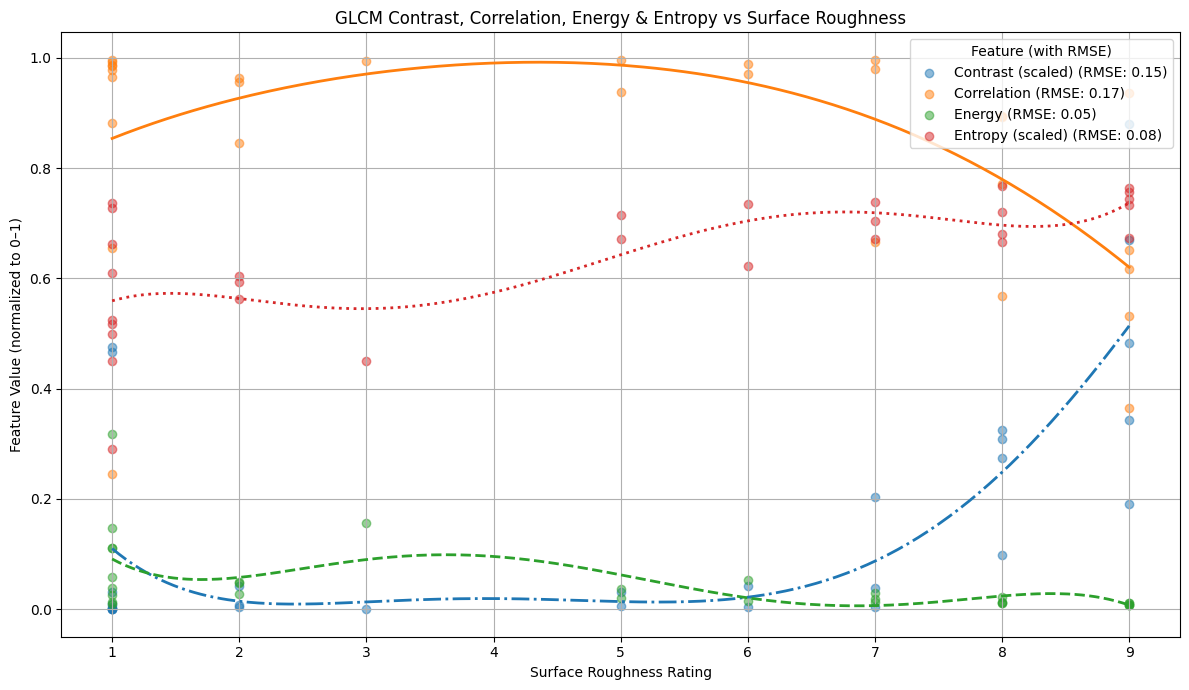

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# assume ratings, contrast_values, correlation_values, energy_values, entropy_values, 
# and root_mean_squared_error() are already defined

degree = 5
smooth_points = 300

# Normalize:
contrast_norm = contrast_values / 2500.0
entropy_norm  = entropy_values  / 10.0

# Compute polynomial fits   
contrast_poly    = np.poly1d(np.polyfit(ratings, contrast_norm, degree))
corr_poly        = np.poly1d(np.polyfit(ratings, correlation_values, degree))
energy_poly      = np.poly1d(np.polyfit(ratings, energy_values, degree))
entropy_poly     = np.poly1d(np.polyfit(ratings, entropy_norm, degree))

# Smooth x for fit curves
x_smooth = np.linspace(min(ratings), max(ratings), smooth_points)

plt.figure(figsize=(12, 7))

# Contrast
plt.scatter(ratings, contrast_norm, alpha=0.5, label=(
    f'Contrast (scaled) '
    f'(RMSE: {root_mean_squared_error(contrast_norm, contrast_poly(ratings)):.2f})'
))
plt.plot(x_smooth, contrast_poly(x_smooth), linewidth=2, linestyle='-.')

# Correlation
plt.scatter(ratings, correlation_values, alpha=0.5, label=(
    f'Correlation '
    f'(RMSE: {root_mean_squared_error(correlation_values, corr_poly(ratings)):.2f})'
))
plt.plot(x_smooth, corr_poly(x_smooth), linewidth=2, linestyle='-')

# Energy
plt.scatter(ratings, energy_values, alpha=0.5, label=(
    f'Energy '
    f'(RMSE: {root_mean_squared_error(energy_values, energy_poly(ratings)):.2f})'
))
plt.plot(x_smooth, energy_poly(x_smooth), linewidth=2, linestyle='--')

# Entropy
plt.scatter(ratings, entropy_norm, alpha=0.5, label=(
    f'Entropy (scaled) '
    f'(RMSE: {root_mean_squared_error(entropy_norm, entropy_poly(ratings)):.2f})'
))
plt.plot(x_smooth, entropy_poly(x_smooth), linewidth=2, linestyle=':')

# Labels & legend
plt.xlabel('Surface Roughness Rating')
plt.ylabel('Feature Value (normalized to 0–1)')
plt.title('GLCM Contrast, Correlation, Energy & Entropy vs Surface Roughness')
plt.legend(title='Feature (with RMSE)', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Raw data points for each feature are shown as semi-transparent markers. Overlaid are degree-5 polynomial fits (300-point smoothing) colored and styled uniquely for each feature, with the legend listing the feature name alongside its root-mean-squared error (RMSE) against the fit. This normalization and combined plot allow direct visual comparison of how each GLCM statistic varies with surface-roughness rating.

### Begin Model Training

First I have to turn the data into a pandas dataframe


In [22]:
import pandas as pd

In [23]:
# Create a DataFrame with the collected data
data = {
    'Image': filenames,
    'Roughness': [int(filename[0]) for filename in filenames],  # Extract roughness rating from filename
    'Contrast': contrast_values,
    'Entropy': entropy_values,
    'Homogeneity': homogenity_values,
    'Energy': energy_values,
    'Correlation': test_values
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

       Image  Roughness     Contrast   Entropy  Homogeneity    Energy  \
0   1(1).jpg          1  1187.864821  6.622981     0.045247  0.012351   
1   1(2).jpg          1     0.781173  5.164116     0.733607  0.111039   
2   1(3).jpg          1     1.016483  4.997665     0.719680  0.111493   
3   1(4).jpg          1     0.260771  2.910433     0.873593  0.317091   
4   1(5).jpg          1    23.569784  5.238559     0.352760  0.058208   
5   1(6).jpg          1     1.983124  4.499115     0.715535  0.147977   
6   1(7).jpg          1    76.578649  7.364324     0.265571  0.025647   
7      1.jpg          1  1167.830465  7.271270     0.062796  0.009984   
8      1.png          1    12.264939  6.103923     0.343268  0.038702   
9   2(1).jpg          2    20.317661  5.934595     0.376443  0.047613   
10  2(2).jpg          2    10.916451  5.622884     0.363628  0.049107   
11     2.jpg          2   103.816053  6.040982     0.160485  0.026852   
12     3.jpg          3     0.403520  4.504037     

In [24]:
roughness_model = LinearRegression()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features (X) and target (y)
X = df[['Contrast', 'Entropy', 'Homogeneity', 'Energy', 'Correlation']]
y = df['Roughness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
roughness_model.fit(X_train, y_train)

# Predict on the test set
y_pred = roughness_model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 4.44
R-squared: 0.51
Mean Absolute Error: 1.85


In [26]:
#Try with KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"")


Mean Squared Error: 3.21
R-squared: 0.65
Mean Absolute Error: 1.67



So at this point I came to realize that I may need more data so I decided to go for some data manipulations

In [27]:
rotations_list = [0,90,180,270]

manipulated_images = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = Image.open(image_dir + filename)

        manipulated_images.append((img,filename[0]))
        
        for rotation_amnt in rotations_list: 
            rotated_img = img.rotate(90, expand=True)
            
            manipulated_images.append((rotated_img,filename[0]))

            width, height = rotated_img.size
            mid_x, mid_y = width // 2, height // 2

            # Define the four quadrants
            quadrants = [
                (0, 0, mid_x, mid_y),          # Top-left
                (mid_x, 0, width, mid_y),       # Top-right
                (0, mid_y, mid_x, height),      # Bottom-left
                (mid_x, mid_y, width, height)   # Bottom-right
            ]

            for idx, (left, top, right, bottom) in enumerate(quadrants):
                cropped_img = rotated_img.crop((left, top, right, bottom))
                #cropped_img.show()

                manipulated_images.append((cropped_img.transpose(Image.FLIP_TOP_BOTTOM),filename[0])) #Flipped Left-Right
                manipulated_images.append((cropped_img.transpose(Image.FLIP_TOP_BOTTOM),filename[0])) #Flipped Top-Down

                


        #rotated_img.show()
        
len(manipulated_images)

1073

In [28]:
for i in range(0,len(manipulated_images)):
    manipulated_images[i][0].save(f"Manipulated_Images/{manipulated_images[i][1]}_{i}.jpg")

1_0.jpg
1_1.jpg
1_10.jpg
1_100.jpg
1_101.jpg
1_102.jpg
1_103.jpg
1_104.jpg
1_105.jpg
1_106.jpg
1_107.jpg
1_108.jpg
1_109.jpg
1_11.jpg
1_110.jpg
1_111.jpg
1_112.jpg
1_113.jpg
1_114.jpg
1_115.jpg
1_116.jpg
1_117.jpg
1_118.jpg
1_119.jpg
1_12.jpg
1_120.jpg
1_121.jpg
1_122.jpg
1_123.jpg
1_124.jpg
1_125.jpg
1_126.jpg
1_127.jpg
1_128.jpg
1_129.jpg
1_13.jpg
1_130.jpg
1_131.jpg
1_132.jpg
1_133.jpg
1_134.jpg
1_135.jpg
1_136.jpg
1_137.jpg
1_138.jpg
1_139.jpg
1_14.jpg
1_140.jpg
1_141.jpg
1_142.jpg
1_143.jpg
1_144.jpg
1_145.jpg
1_146.jpg
1_147.jpg
1_148.jpg
1_149.jpg
1_15.jpg
1_150.jpg
1_151.jpg
1_152.jpg
1_153.jpg
1_154.jpg
1_155.jpg
1_156.jpg
1_157.jpg
1_158.jpg
1_159.jpg
1_16.jpg
1_160.jpg
1_161.jpg
1_162.jpg
1_163.jpg
1_164.jpg
1_165.jpg
1_166.jpg
1_167.jpg
1_168.jpg
1_169.jpg
1_17.jpg
1_170.jpg
1_171.jpg
1_172.jpg
1_173.jpg
1_174.jpg
1_175.jpg
1_176.jpg
1_177.jpg
1_178.jpg
1_179.jpg
1_18.jpg
1_180.jpg
1_181.jpg
1_182.jpg
1_183.jpg
1_184.jpg
1_185.jpg
1_186.jpg
1_187.jpg
1_188.jpg
1_189.jpg
1_1

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1073,) and arg 1 with shape (29,).

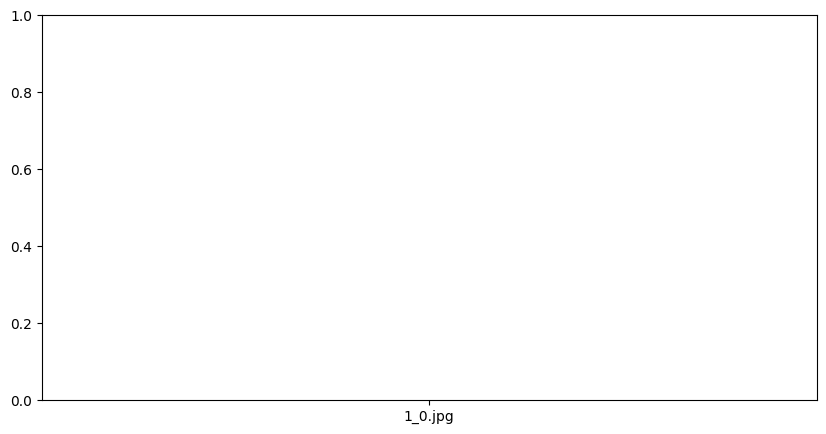

In [ ]:
image_dir = 'Manipulated_Images/'
# List to store the results
contrast_results_2 = []
entropy_results_2 = []
homogenity_results_2 = []
energy_results_2 = []
test_results_2 = []

# Iterate over all files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        print(filename)
        image_path = os.path.join(image_dir, filename)
        contrast_value = calculate_glcm_contrast(image_path)
        entropy_val = calculate_glcm_entropy(image_path)
        homogenity_val = calculate_glcm_homogenity(image_path)
        energy_val = calculate_glcm_energy(image_path)
        test_val  = calculate_glcm_feature(image_path=image_path, feature='correlation')
        if contrast_value is not None:
            contrast_results_2.append((filename, contrast_value))
        if entropy_val is not None:
            entropy_results_2.append((filename,entropy_val))
        if homogenity_val is not None:
            homogenity_results_2.append((filename,homogenity_val))
        if energy_val is not None:
            energy_results_2.append((filename,energy_val))
        if test_val is not None:
            test_results_2.append((filename,test_val))
        
        

# Sort results by filename
contrast_results_2.sort(key=lambda x: x[0])

# Separate filenames and contrast values
filenames, contrast_values_2 = zip(*contrast_results_2)
filenames, entropy_values_2 = zip(*contrast_results_2)
filenames, homogenity_values_2 = zip(*homogenity_results_2)
filenames, test_values_2 = zip(*test_results_2)
filenames, energy_values_2 = zip(*energy_results_2)

correlation_values_2 = test_values_2



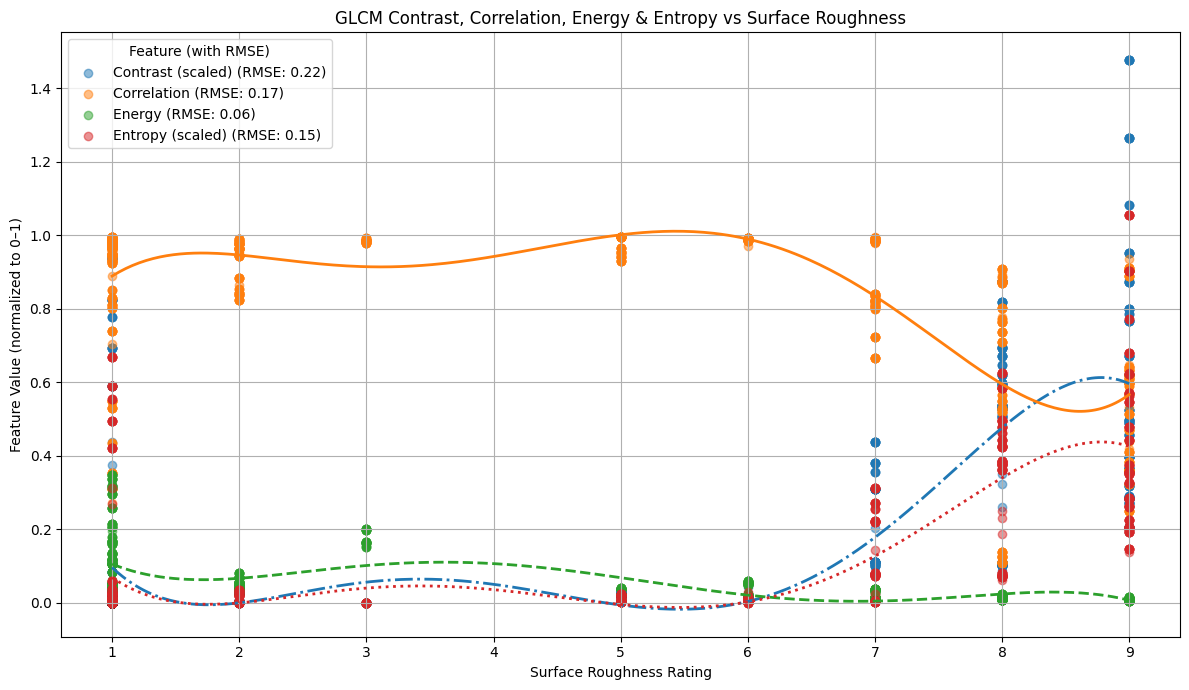

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# assume ratings, contrast_values_2, correlation_values_2, energy_values_2, entropy_values_2, 
# and root_mean_squared_error() are already defined
ratings = [int(filename[0]) for filename in filenames]


degree = 5
smooth_points = 300

# Normalize:
contrast_norm = np.array(contrast_values_2) / 2500.0
entropy_norm  = np.array(entropy_values_2)  / 3500.0

# Compute polynomial fits   
contrast_poly    = np.poly1d(np.polyfit(ratings, contrast_norm, degree))
corr_poly        = np.poly1d(np.polyfit(ratings, correlation_values_2, degree))
energy_poly      = np.poly1d(np.polyfit(ratings, energy_values_2, degree))
entropy_poly     = np.poly1d(np.polyfit(ratings, entropy_norm, degree))

# Smooth x for fit curves
x_smooth = np.linspace(min(ratings), max(ratings), smooth_points)

plt.figure(figsize=(12, 7))

# Contrast
plt.scatter(ratings, contrast_norm, alpha=0.5, label=(
    f'Contrast (scaled) '
    f'(RMSE: {root_mean_squared_error(contrast_norm, contrast_poly(ratings)):.2f})'
))
plt.plot(x_smooth, contrast_poly(x_smooth), linewidth=2, linestyle='-.')

# Correlation
plt.scatter(ratings, correlation_values_2, alpha=0.5, label=(
    f'Correlation '
    f'(RMSE: {root_mean_squared_error(correlation_values_2, corr_poly(ratings)):.2f})'
))
plt.plot(x_smooth, corr_poly(x_smooth), linewidth=2, linestyle='-')

# Energy
plt.scatter(ratings, energy_values_2, alpha=0.5, label=(
    f'Energy '
    f'(RMSE: {root_mean_squared_error(energy_values_2, energy_poly(ratings)):.2f})'
))
plt.plot(x_smooth, energy_poly(x_smooth), linewidth=2, linestyle='--')

# Entropy
plt.scatter(ratings, entropy_norm, alpha=0.5, label=(
    f'Entropy (scaled) '
    f'(RMSE: {root_mean_squared_error(entropy_norm, entropy_poly(ratings)):.2f})'
))
plt.plot(x_smooth, entropy_poly(x_smooth), linewidth=2, linestyle=':')

# Labels & legend
plt.xlabel('Surface Roughness Rating')
plt.ylabel('Feature Value (normalized to 0–1)')
plt.title('GLCM Contrast, Correlation, Energy & Entropy vs Surface Roughness')
plt.legend(title='Feature (with RMSE)', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Create a DataFrame with the collected data
data_2 = {
    'Image': filenames,
    'Roughness': [int(filename[0]) for filename in filenames],  # Extract roughness rating from filename
    'Contrast': contrast_values_2,
    'Entropy': entropy_values_2,
    'Homogeneity': homogenity_values_2,
    'Energy': energy_values_2,
    'Correlation': test_values_2
}

df = pd.DataFrame(data_2)

# Display the DataFrame
print(df)

          Image  Roughness     Contrast      Entropy  Homogeneity    Energy  \
0       1_0.jpg          1  1097.886544  1097.886544     0.047663  0.011988   
1       1_1.jpg          1    86.461462    86.461462     0.174581  0.027144   
2      1_10.jpg          1    86.461462    86.461462     0.174581  0.027144   
3     1_100.jpg          1     0.853710     0.853710     0.733780  0.120634   
4     1_101.jpg          1     0.853710     0.853710     0.733780  0.120634   
...         ...        ...          ...          ...          ...       ...   
1068  9_995.jpg          9  1678.456173  1678.456173     0.036003  0.008740   
1069  9_996.jpg          9  1678.456173  1678.456173     0.036003  0.008740   
1070  9_997.jpg          9  1995.983803  1995.983803     0.032352  0.008386   
1071  9_998.jpg          9  1995.983803  1995.983803     0.032352  0.008386   
1072  9_999.jpg          9   482.557964   482.557964     0.110667  0.011969   

      Correlation  
0        0.272989  
1        0.

In [32]:
X = df[['Contrast','Entropy','Energy','Correlation']]
y = df['Roughness']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"")

Mean Squared Error: 0.51
R-squared: 0.95
Mean Absolute Error: 0.18



Now to test this bad boy


In [33]:
# Define the path to the test image
test_image_path = 'SAND40.jpg'

# Calculate GLCM features for the test image
contrast_value = calculate_glcm_contrast(test_image_path)
entropy_value = calculate_glcm_entropy(test_image_path)
homogeneity_value = calculate_glcm_homogenity(test_image_path)
energy_value = calculate_glcm_energy(test_image_path)
correlation_value = calculate_glcm_feature(test_image_path, 'correlation')

# Create a DataFrame for the test image features
test_data = pd.DataFrame([{
    'Contrast': contrast_value,
    'Entropy': entropy_value,
    #'Homogeneity': homogeneity_value,
    'Energy': energy_value,
    'Correlation': correlation_value
}])

# Predict the roughness rating using the trained model
predicted_roughness = neigh.predict(test_data)

print(f"Predicted Roughness for {test_image_path}: {predicted_roughness[0]}")

Predicted Roughness for SAND40.jpg: 2.2


fuck


In [34]:

test_image_path = 'closeup_sandpaper.jpg'

# Calculate GLCM features for the test image
contrast_value = calculate_glcm_contrast(test_image_path)
entropy_value = calculate_glcm_entropy(test_image_path)
homogeneity_value = calculate_glcm_homogenity(test_image_path)
energy_value = calculate_glcm_energy(test_image_path)
correlation_value = calculate_glcm_feature(test_image_path, 'correlation')

# Create a DataFrame for the test image features
test_data = pd.DataFrame([{
    'Contrast': contrast_value,
    'Entropy': entropy_value,
    #'Homogeneity': homogeneity_value,
    'Energy': energy_value,
    'Correlation': correlation_value
}])

# Predict the roughness rating using the trained model
predicted_roughness = neigh.predict(test_data)

print(f"Predicted Roughness for {test_image_path}: {predicted_roughness[0]}")

Predicted Roughness for closeup_sandpaper.jpg: 7.0


In [35]:

test_image_path = 'Blue_Printer_Paper.png'

# Calculate GLCM features for the test image
contrast_value = calculate_glcm_contrast(test_image_path)
entropy_value = calculate_glcm_entropy(test_image_path)
homogeneity_value = calculate_glcm_homogenity(test_image_path)
energy_value = calculate_glcm_energy(test_image_path)
correlation_value = calculate_glcm_feature(test_image_path, 'correlation')

# Create a DataFrame for the test image features
test_data = pd.DataFrame([{
    'Contrast': contrast_value,
    'Entropy': entropy_value,
    #'Homogeneity': homogeneity_value,
    'Energy': energy_value,
    'Correlation': correlation_value
}])

# Predict the roughness rating using the trained model
predicted_roughness = neigh.predict(test_data)

print(f"Predicted Roughness for {test_image_path}: {predicted_roughness[0]}")

Predicted Roughness for Blue_Printer_Paper.png: 1.0


Oberservation, at this point becasue of the way the data is - the models really seem to be acting basically as classification models


In [36]:
#Let me actually make a method to test this

def test_model(test_model,test_image_path):
    # Calculate GLCM features for the test image
    contrast_value = calculate_glcm_contrast(test_image_path)
    entropy_value = calculate_glcm_entropy(test_image_path)
    homogeneity_value = calculate_glcm_homogenity(test_image_path)
    energy_value = calculate_glcm_energy(test_image_path)
    correlation_value = calculate_glcm_feature(test_image_path, 'correlation')

    # Create a DataFrame for the test image features
    test_data = pd.DataFrame([{
        'Contrast': contrast_value,
        'Entropy': entropy_value,
        #'Homogeneity': homogeneity_value,
        'Energy': energy_value,
        'Correlation': correlation_value
    }])
    predicted_roughness = test_model.predict(test_data)

    print(f"Predicted Roughness for {test_image_path}: {predicted_roughness[0]}")
    return predicted_roughness[0]

test_model(neigh,'Blue_Printer_Paper.png')

Predicted Roughness for Blue_Printer_Paper.png: 1.0


1.0

In [37]:
X_train

,Contrast,Entropy,Energy,Correlation
1041,1678.456173,1678.456173,0.008740,0.569705
1071,1995.983803,1995.983803,0.008386,0.513970
243,11.565245,11.565245,0.038949,0.977197
801,1731.966908,1731.966908,0.012501,0.124804
884,1267.473440,1267.473440,0.010063,0.549855
...,...,...,...,...
330,0.785209,0.785209,0.135637,0.987901
466,0.513934,0.513934,0.167096,0.988271
121,3.011108,3.011108,0.257489,0.982300
1044,1995.983803,1995.983803,0.008386,0.513970


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_regr = MLPRegressor(random_state=1, max_iter=20000, tol=1e-6) 

mlp_regr.fit(X_train_scaled, y_train)

y_pred = mlp_regr.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Mean Squared Error: 2.89
R-squared: 0.72
Mean Absolute Error: 1.28


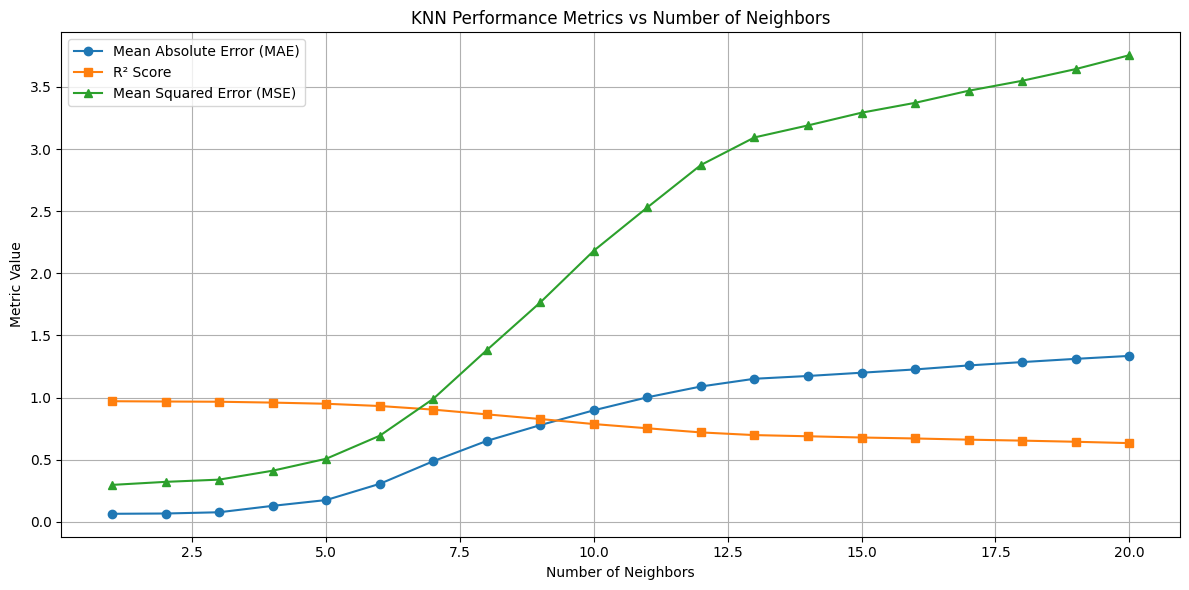

In [39]:
# Initialize lists to store metrics
mae_list = []
r2_list = []
mse_list = []
neighbors_range = range(1, 21)  # Test for 1 to 20 neighbors

# Loop through different numbers of neighbors
for n_neighbors in neighbors_range:
    # Create and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate metrics
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot the metrics
plt.figure(figsize=(12, 6))
plt.plot(neighbors_range, mae_list, label='Mean Absolute Error (MAE)', marker='o')
plt.plot(neighbors_range, r2_list, label='R² Score', marker='s')
plt.plot(neighbors_range, mse_list, label='Mean Squared Error (MSE)', marker='^')
plt.xlabel('Number of Neighbors')
plt.ylabel('Metric Value')
plt.title('KNN Performance Metrics vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Predicted Roughness for closeup_sandpaper.jpg: 9.0
Predicted Roughness for Blue_Printer_Paper.png: 1.2
Predicted Roughness for closeup_sandpaper.jpg: 8.6
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 8.2
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 8.2
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 8.2
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 7.8
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 7.4
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 7.0
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 7.0
Predicted Roughness for Blue_Printer_Paper.png: 1.0
Predicted Roughness for closeup_sandpaper.jpg: 7.0
Predicted Roughness fo

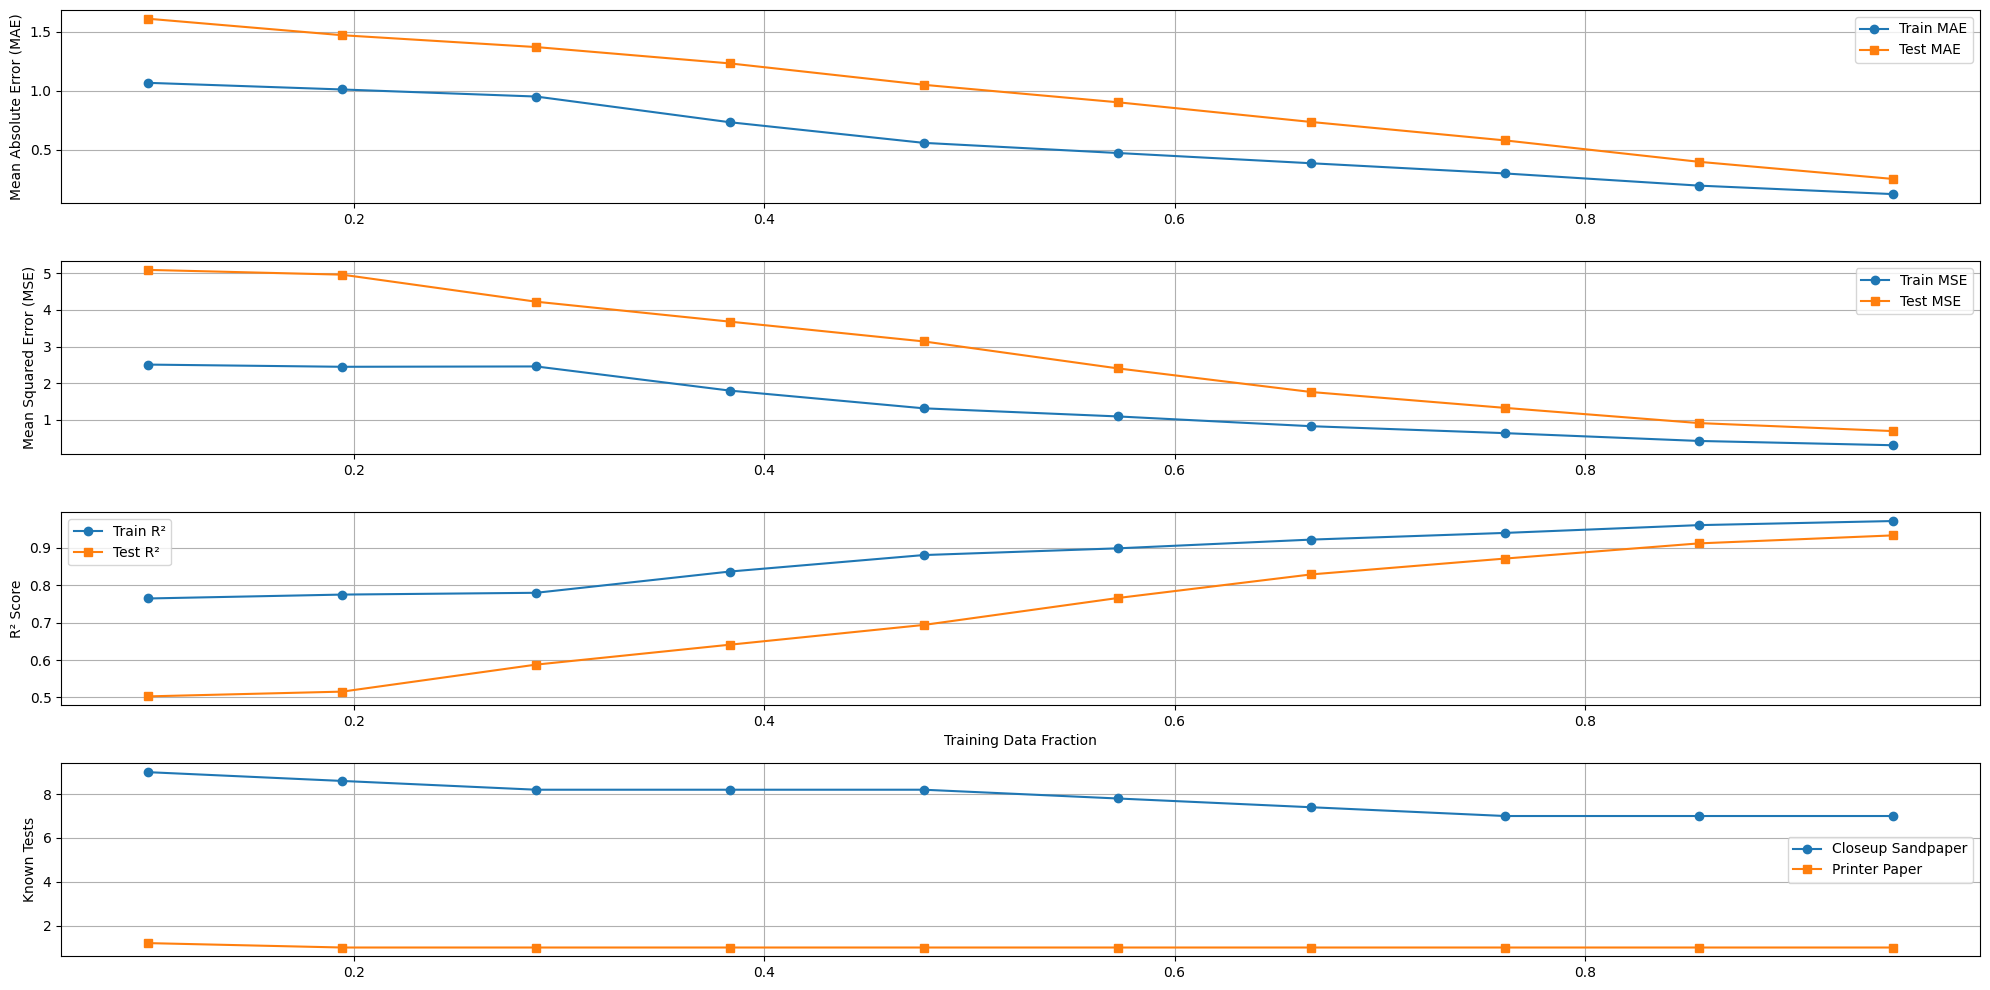

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import matplotlib.pyplot as plt

# Initialize lists to store metrics
train_sizes = np.linspace(0.1, .95, 10)  # 10 different training sizes from 10% to 100%
train_mae_list, test_mae_list = [], []
train_mse_list, test_mse_list = [], []
train_r2_list, test_r2_list = [], []
closeup_sandpaper_score, printer_paper_score = [], []

# Loop through different training sizes
for train_size in train_sizes:
    # Split the data into training and testing sets with the current training size
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    
    # Train the model
    neigh.fit(X_train_partial, y_train_partial)
    
    # Predict on the training and testing sets
    y_train_pred = neigh.predict(X_train_partial)
    y_test_pred = neigh.predict(X_test)
    
    # Calculate metrics for training set
    train_mae_list.append(mean_absolute_error(y_train_partial, y_train_pred))
    train_mse_list.append(mean_squared_error(y_train_partial, y_train_pred))
    train_r2_list.append(r2_score(y_train_partial, y_train_pred))

    #Calculate results of blue paper and sandpaper
    closeup_sandpaper_score.append( test_model(neigh,'closeup_sandpaper.jpg'))
    printer_paper_score.append(test_model(neigh,'Blue_Printer_Paper.png'))
    
    # Calculate metrics for testing set
    test_mae_list.append(mean_absolute_error(y_test, y_test_pred))
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))
    test_r2_list.append(r2_score(y_test, y_test_pred))

# Plot the metrics
plt.figure(figsize=(20, 10))

# MAE plot
plt.subplot(4, 1, 1)
plt.plot(train_sizes, train_mae_list, label='Train MAE', marker='o')
plt.plot(train_sizes, test_mae_list, label='Test MAE', marker='s')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)

# MSE plot
plt.subplot(4, 1, 2)
plt.plot(train_sizes, train_mse_list, label='Train MSE', marker='o')
plt.plot(train_sizes, test_mse_list, label='Test MSE', marker='s')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)

# R² score plot
plt.subplot(4, 1, 3)
plt.plot(train_sizes, train_r2_list, label='Train R²', marker='o')
plt.plot(train_sizes, test_r2_list, label='Test R²', marker='s')
plt.xlabel('Training Data Fraction')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(train_sizes, closeup_sandpaper_score, label='Closeup Sandpaper', marker='o')
plt.plot(train_sizes, printer_paper_score, label='Printer Paper', marker='s')
plt.ylabel('Known Tests')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

This model is overfit as hell but tbh it'll do, all we really need for monday is just something that can tell the difference between a hella like rough one and a not so rough one

$$\text{Vibrational Output}=\frac{1023}{1+e^{-2.5\left(x-7\right)}} \text{, where x is equal to the value outputted by the model}$$

In [41]:
df


,Image,Roughness,Contrast,Entropy,Homogeneity,Energy,Correlation
0,1_0.jpg,1,1097.886544,1097.886544,0.047663,0.011988,0.272989
1,1_1.jpg,1,86.461462,86.461462,0.174581,0.027144,0.944515
2,1_10.jpg,1,86.461462,86.461462,0.174581,0.027144,0.944515
3,1_100.jpg,1,0.853710,0.853710,0.733780,0.120634,0.990833
4,1_101.jpg,1,0.853710,0.853710,0.733780,0.120634,0.990833
...,...,...,...,...,...,...,...
1068,9_995.jpg,9,1678.456173,1678.456173,0.036003,0.008740,0.569705
1069,9_996.jpg,9,1678.456173,1678.456173,0.036003,0.008740,0.569705
1070,9_997.jpg,9,1995.983803,1995.983803,0.032352,0.008386,0.513970
1071,9_998.jpg,9,1995.983803,1995.983803,0.032352,0.008386,0.513970


## Now we're running out of time so now we have to make a model for production


In [42]:
df.to_csv('image_data.csv', index=False)

In [43]:

#Begin Training Model

def train_and_init_model():
    prod_df = pd.read_csv("image_data.csv")
    X = prod_df[['Contrast','Entropy','Energy','Correlation']]
    y = prod_df['Roughness']


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    neigh = KNeighborsRegressor(n_neighbors=5)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)

    
    # Calculate accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"")

    return neigh
    
trained_model = train_and_init_model()





Mean Squared Error: 0.51
R-squared: 0.95
Mean Absolute Error: 0.18



In [66]:
import requests
from PIL import Image
import numpy as np
import pandas as pd

def predict_roughness_from_url(url, trained_model):
    """
    Predicts the roughness of a surface based on an image captured from a URL.

    Parameters:
        url (str): The URL to capture the image.
        trained_model: The trained model for roughness prediction.

    Returns:
        float: The predicted roughness value.
    """

    # Make a request to get the image
    print("REQUESTING DATA\n")
    response = requests.get(url)
    if response.status_code == 200:
        with open('captured_image.jpg', 'wb') as file:
            file.write(response.content)
        print("Image saved as captured_image.jpg")
    else:
        print("Failed to capture image")
        return None

    # Load the image and calculate GLCM features
    test_image_path = 'captured_image.jpg'
    contrast_value = calculate_glcm_contrast(test_image_path)
    entropy_value = calculate_glcm_entropy(test_image_path)
    homogeneity_value = calculate_glcm_homogenity(test_image_path)
    energy_value = calculate_glcm_energy(test_image_path)
    correlation_value = calculate_glcm_feature(test_image_path, 'correlation')

    # Create a DataFrame for the test image features
    test_data = pd.DataFrame([{
        'Contrast': contrast_value,
        'Entropy': entropy_value,
        'Energy': energy_value,
        'Correlation': correlation_value
    }])

    # Predict the roughness rating using the trained model
    predicted_roughness = trained_model.predict(test_data)

    print(f"Predicted Roughness for the captured image: {predicted_roughness[0]}")
    return predicted_roughness[0]


# Example usage
url = 'http://192.168.4.1/capture'
predicted_roughness = predict_roughness_from_url(url, trained_model)

REQUESTING DATA

Image saved as captured_image.jpg
Predicted Roughness for the captured image: 6.0


In [67]:
url = 'http://192.168.4.1/capture'
predicted_roughness = predict_roughness_from_url(url, trained_model)

REQUESTING DATA

Image saved as captured_image.jpg
Predicted Roughness for the captured image: 1.0


In [1]:
from PIL import Image
import numpy as np
import os

# Directory to save the images
output_dir = 'Manipulated_Images/'
os.makedirs(output_dir, exist_ok=True)

# Generate single-color images
colors = ['red', 'green', 'blue', 'black', 'white', 'yellow', 'cyan', 'magenta']
for i, color in enumerate(colors):
    img = Image.new('RGB', (256, 256), color)
    img.save(os.path.join(output_dir, f'single_color_{color}.jpg'))

# Generate gradient images
width, height = 256, 256
for i in range(5):  # Create 5 gradient images
    gradient = np.zeros((height, width, 3), dtype=np.uint8)
    for x in range(width):
        for y in range(height):
            gradient[y, x] = (x * 255 // width, y * 255 // height, (x + y) * 255 // (2 * width))
    gradient_img = Image.fromarray(gradient)
    gradient_img.save(os.path.join(output_dir, f'gradient_{i}.jpg'))

print("Single-color and gradient images have been added to the Manipulated_Images/ directory.")

Single-color and gradient images have been added to the Manipulated_Images/ directory.
